Written By: Ananta Faadillah Sophan

# Employee Attrition

## Data Description:

| Variable                | Categories                 |
|-------------------------|----------------------------|
| Education               | 1 'Below College'          |
|                         | 2 'College'                |
|                         | 3 'Bachelor'               |
|                         | 4 'Master'                 |
|                         | 5 'Doctor'                 |
| EnvironmentSatisfaction | 1 'Low'                    |
|                         | 2 'Medium'                 |
|                         | 3 'High'                   |
|                         | 4 'Very High'              |
| JobInvolvement          | 1 'Low'                    |
|                         | 2 'Medium'                 |
|                         | 3 'High'                   |
|                         | 4 'Very High'              |
| JobSatisfaction         | 1 'Low'                    |
|                         | 2 'Medium'                 |
|                         | 3 'High'                   |
|                         | 4 'Very High'              |
| PerformanceRating       | 1 'Low'                    |
|                         | 2 'Good'                   |
|                         | 3 'Excellent'              |
|                         | 4 'Outstanding'            |
| RelationshipSatisfaction| 1 'Low'                    |
|                         | 2 'Medium'                 |
|                         | 3 'High'                   |
|                         | 4 'Very High'              |
| WorkLifeBalance         | 1 'Bad'                    |
|                         | 2 'Good'                   |
|                         | 3 'Better'                 |
|                         | 4 'Best'                   |


## Import Library

In [1]:
!pip install feature_engine
!pip install scikit-learn==1.2.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
import pickle
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

import tensorflow as tf
import plotly.graph_objects as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1.Data Loading**

In [4]:
df = pd.read_csv('/content/drive/My Drive/Real_Case_Project/Dataset/Human_Resources.csv')

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
pd.reset_option('display.max_columns')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## **2. Data Cleaning**

There are no Null or Duplicated Value

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df[df.duplicated()].shape

(0, 35)

### 2.1 Value Checking

In [10]:
for x in df:
    print(f'Value In {x}: ', df[x].unique(), '\n', 'Total Value:', len(df[x].unique()))
    print('-'*100)

Value In Age:  [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 
 Total Value: 43
----------------------------------------------------------------------------------------------------
Value In Attrition:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In BusinessTravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 
 Total Value: 3
----------------------------------------------------------------------------------------------------
Value In DailyRate:  [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 

### 2.2 Removing Unnecessary Columns

based on the assumptions, it can be seen that there are some columns that only have 1 value. Therefore I will remove those columns from the dataset:
*   EmployeeCount
*   Over18
*   StandardHours




In [11]:
df.drop(['EmployeeCount', 'Over18','StandardHours'], axis=1, inplace=True)

I also found that the 'Employee Number' column has no significant meaning as it only represents the id of the employee. Therefore i will remove it aswell

In [12]:
df.drop(['EmployeeNumber'], axis=1, inplace=True)

i am moving the target columns to the last index of the dataframe

In [13]:
attrition_col = df.pop('Attrition')
df['Attrition'] = attrition_col

Note:  
By using df.pop('attrition'), you remove the 'attrition' column from the DataFrame and store it in the attrition_col variable. Then, by assigning attrition_col back to the DataFrame with df['attrition'] = attrition_col, the 'attrition' column is added back to the DataFrame as the last column.

## **3. Exploratory Data Analysis**

### 3.1 Target Definition

| Degree of imbalance      | Proportion of Minority Class    |
|-------------------------|---------------------------------|
| Mild                    | 20-40% of the dataset           |
| Moderate                | 1-20% of the dataset            |
| Extreme                 | < 1% of the dataset             |




No     1233
Yes     237
Name: Attrition, dtype: int64
--------------------------------------------------------------------------------


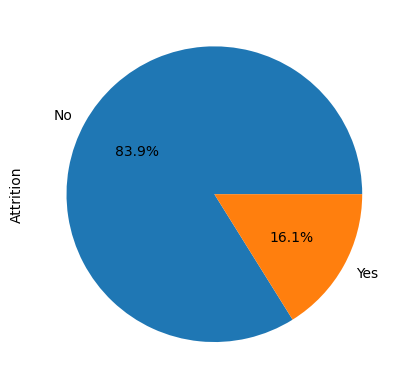

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

attrition_counts = df['Attrition'].value_counts()

# Print the value counts
print(attrition_counts)
print('-' * 80)

# Create the pie chart with value counts and labels
attrition_counts.plot(kind='pie', autopct='%1.1f%%', labels=attrition_counts.index)

plt.show()

In [15]:
df_stay = df[df['Attrition'] == 'No']
df_left = df[df['Attrition'] == 'Yes']

### 3.2 Retained Employees

WorkLifeBalance, Age, Marital Status, Monthly Income, Distance From Home, Department, Gender

In [16]:
df_stay.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0


In [17]:
df_eda_stay = df_stay[[
    'Department', 'Gender', 'Age', 'Education', 'DistanceFromHome', 'MonthlyIncome', 'WorkLifeBalance', 'Attrition'
]]
df_eda_stay.head()

,Department,Gender,Age,Education,DistanceFromHome,MonthlyIncome,WorkLifeBalance,Attrition
1,Research & Development,Male,49,1,8,5130,3,No
3,Research & Development,Female,33,4,3,2909,3,No
4,Research & Development,Male,27,1,2,3468,3,No
5,Research & Development,Male,32,2,2,3068,2,No
6,Research & Development,Female,59,3,3,2670,2,No


In [18]:
conditions = [
    (df_eda_stay['Age'] >= 20) & (df_eda_stay['Age'] < 30),
    (df_eda_stay['Age'] >= 30) & (df_eda_stay['Age'] < 40),
    (df_eda_stay['Age'] >= 40) & (df_eda_stay['Age'] < 50),
    (df_eda_stay['Age'] >= 50) & (df_eda_stay['Age'] < 60)
]
choices = ['20s', '30s', '40s', '50s']

# Create the new 'AgeRange' column
df_eda_stay['AgeRange'] = np.select(conditions, choices, default='Others')

#### 3.2.1 Age Range of Retained Employees

In [19]:
df_ageranges = df_eda_stay.groupby(['AgeRange', 'Gender', 'Attrition']).size().reset_index(name='Total').sort_values('Total',ascending = True)

In [20]:
df_ageranges

,AgeRange,Gender,Attrition,Total
9,Others,Male,No,5
8,Others,Female,No,7
6,50s,Female,No,66
0,20s,Female,No,79
7,50s,Male,No,79
4,40s,Female,No,130
1,20s,Male,No,149
5,40s,Male,No,185
2,30s,Female,No,219
3,30s,Male,No,314


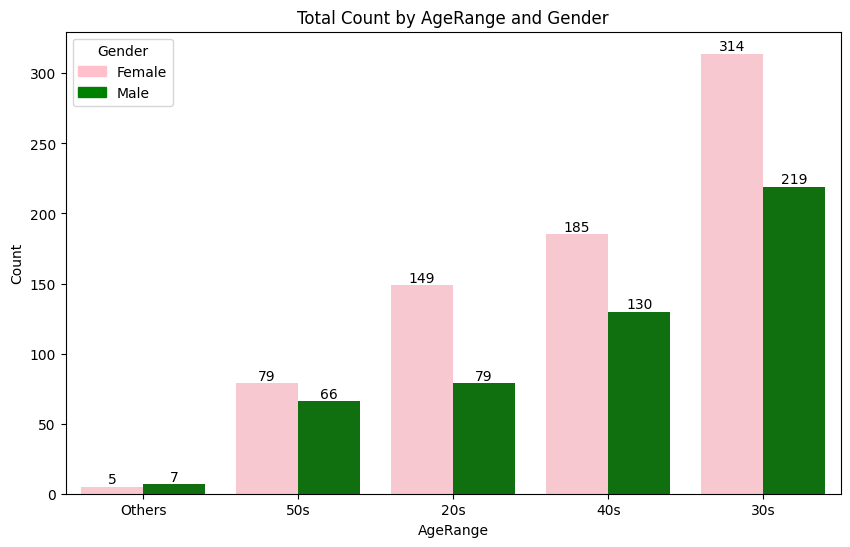

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_ageranges, x='AgeRange', y='Total', hue='Gender', palette=['pink', 'green'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

legend_labels = ['Female', 'Male']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['pink', 'green']]
plt.legend(legend_handles, legend_labels, title='Gender')
plt.xlabel('AgeRange')
plt.ylabel('Count')
plt.title('Total Count by AgeRange and Gender')
plt.show()

#### 3.2.2 Seniors Employee

In [22]:
df_senior = df[(df['Age']>40) & (df['Age']<=70)]

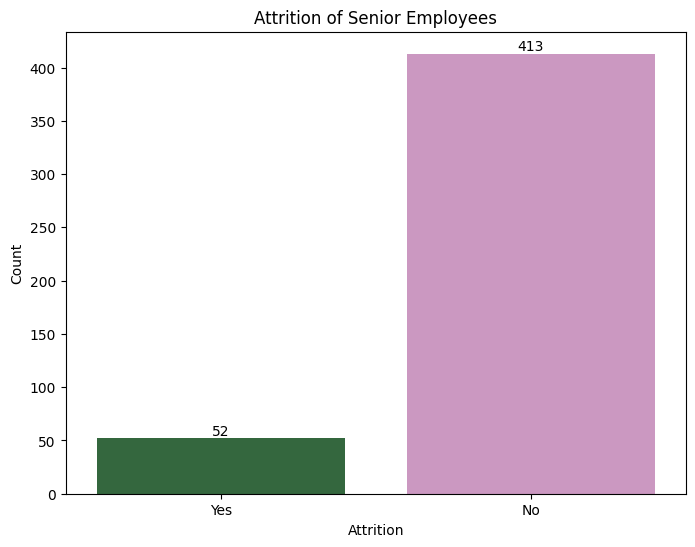

In [23]:
plt.figure(figsize=(8, 6))
ax= sns.countplot(data=df_senior, x='Attrition', palette='cubehelix')
plt.xlabel('Attrition')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.ylabel('Count')
plt.title('Attrition of Senior Employees')
plt.show()

#### 3.2.3 Distance From Home

<Figure size 1500x500 with 0 Axes>

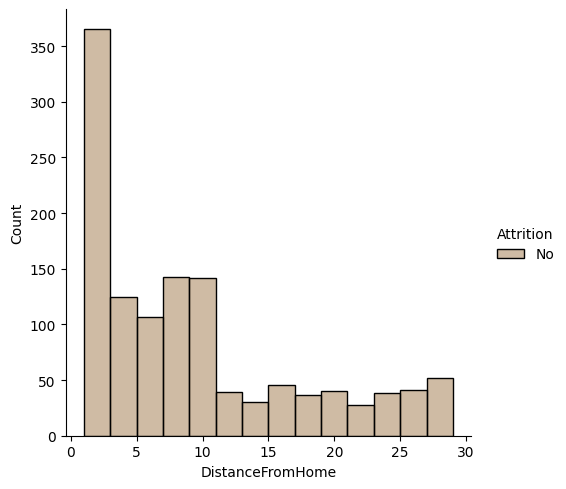

In [24]:
plt.figure(figsize=(15,5))
sns.displot(x='DistanceFromHome',data=df_eda_stay, palette="cubehelix", hue='Attrition')
plt.show()

#### 3.2.4 Monthly Income

<Figure size 1500x500 with 0 Axes>

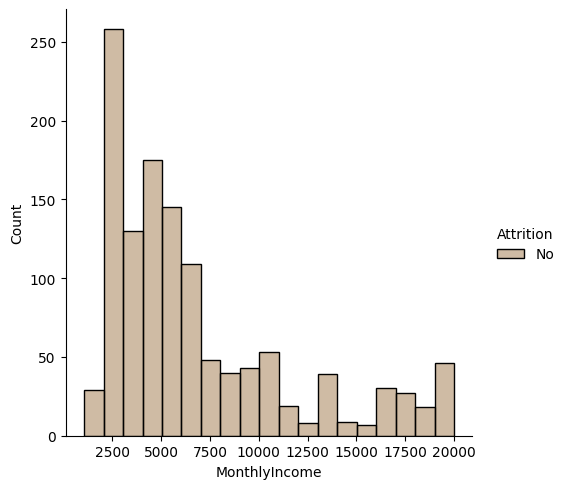

In [25]:
plt.figure(figsize=(15,5))
sns.displot(x='MonthlyIncome',data=df_eda_stay, palette="cubehelix", hue='Attrition')
plt.show()

### 3.3 Exited Employees

In [26]:
df_left.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0
MonthlyIncome,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


In [27]:
df_eda_left = df_left[[
    'Department', 'Gender', 'Age', 'Education', 'MaritalStatus', 'DistanceFromHome', 'MonthlyIncome', 'WorkLifeBalance', 'Attrition',
]]
df_eda_left.head()

,Department,Gender,Age,Education,MaritalStatus,DistanceFromHome,MonthlyIncome,WorkLifeBalance,Attrition
0,Sales,Female,41,2,Single,1,5993,1,Yes
2,Research & Development,Male,37,2,Single,2,2090,3,Yes
14,Research & Development,Male,28,3,Single,24,2028,3,Yes
21,Sales,Male,36,4,Single,9,3407,3,Yes
24,Research & Development,Male,34,1,Single,6,2960,3,Yes


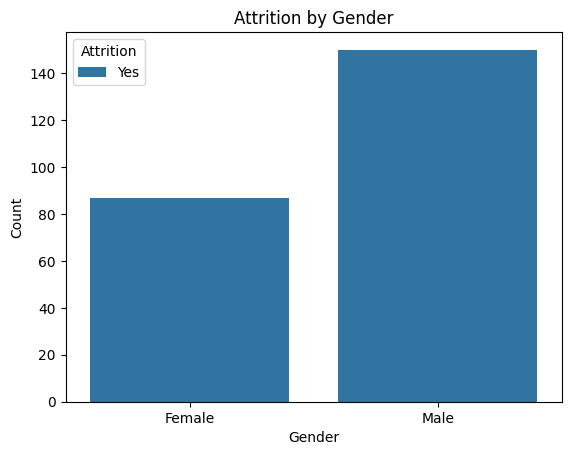

In [28]:
sns.countplot(data=df_eda_left, x='Gender', hue='Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attrition by Gender')
plt.show()

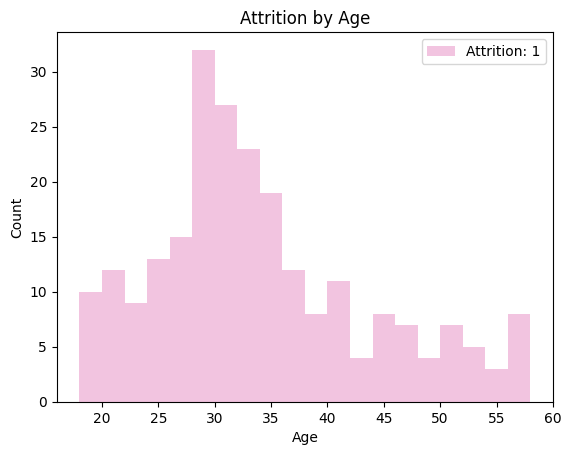

In [29]:
import matplotlib.pyplot as plt
# Set a custom color palette
colors = sns.color_palette('Set2')
plt.hist(df_eda_left['Age'], bins=20, alpha=0.5, label='Attrition: 1',color=colors[3])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Attrition by Age')
plt.legend()
plt.show()


In [30]:
df_eda_left['Age'].unique()

array([41, 37, 28, 36, 34, 32, 39, 24, 50, 26, 48, 46, 20, 25, 56, 31, 58,
       19, 51, 35, 38, 29, 30, 33, 47, 44, 18, 52, 21, 40, 22, 27, 45, 42,
       55, 23, 49, 43, 53])

In [31]:
conditions = [
    (df_eda_left['Age'] >= 20) & (df_eda_left['Age'] < 30),
    (df_eda_left['Age'] >= 30) & (df_eda_left['Age'] < 40),
    (df_eda_left['Age'] >= 40) & (df_eda_left['Age'] < 50),
    (df_eda_left['Age'] >= 50) & (df_eda_left['Age'] < 60)
]
choices = ['20s', '30s', '40s', '50s']

# Create the new 'AgeRange' column
df_eda_left['AgeRange'] = np.select(conditions, choices, default='Others')

In [32]:
df_eda_left

,Department,Gender,Age,Education,MaritalStatus,DistanceFromHome,MonthlyIncome,WorkLifeBalance,Attrition,AgeRange
0,Sales,Female,41,2,Single,1,5993,1,Yes,40s
2,Research & Development,Male,37,2,Single,2,2090,3,Yes,30s
14,Research & Development,Male,28,3,Single,24,2028,3,Yes,20s
21,Sales,Male,36,4,Single,9,3407,3,Yes,30s
24,Research & Development,Male,34,1,Single,6,2960,3,Yes,30s
...,...,...,...,...,...,...,...,...,...,...
1438,Sales,Male,23,3,Married,9,1790,2,Yes,20s
1442,Research & Development,Male,29,4,Married,1,4787,4,Yes,20s
1444,Research & Development,Male,56,2,Married,7,2339,1,Yes,50s
1452,Sales,Male,50,4,Divorced,1,6728,3,Yes,50s


#### 3.3.1 Age Range of Exited Employees

In [33]:
agerange = df_eda_left.groupby(['AgeRange', 'Gender', 'Attrition']).size()

In [34]:
print(agerange)

AgeRange  Gender  Attrition
20s       Female  Yes          33
          Male    Yes          48
30s       Female  Yes          32
          Male    Yes          57
40s       Female  Yes          14
          Male    Yes          20
50s       Female  Yes           5
          Male    Yes          18
Others    Female  Yes           3
          Male    Yes           7
dtype: int64


In [35]:
df_agerange = df_eda_left.groupby(['AgeRange', 'Gender', 'Attrition']).size().reset_index(name='Total').sort_values('Total',ascending = True)

Note: The size() function is used after the groupby() operation to calculate the count or size of each group. It returns a Series or DataFrame object with the count of occurrences for each unique combination of the grouped variables. In this case, it counts the occurrences for each combination of 'AgeRange', 'Gender', and 'Attrition'.

Note: The reset_index() function is used to convert the resulting Series into a DataFrame. The name='Total' argument sets the name of the column that will contain the count values as 'Total'.

In [36]:
df_agerange.columns.tolist()

['AgeRange', 'Gender', 'Attrition', 'Total']

In [37]:
df_agerange = df_agerange.reset_index(drop=True)
df_agerange = df_agerange[
    ['AgeRange', 'Gender', 'Total', 'Attrition']
]

In [38]:
df_agerange

,AgeRange,Gender,Total,Attrition
0,Others,Female,3,Yes
1,50s,Female,5,Yes
2,Others,Male,7,Yes
3,40s,Female,14,Yes
4,50s,Male,18,Yes
5,40s,Male,20,Yes
6,30s,Female,32,Yes
7,20s,Female,33,Yes
8,20s,Male,48,Yes
9,30s,Male,57,Yes


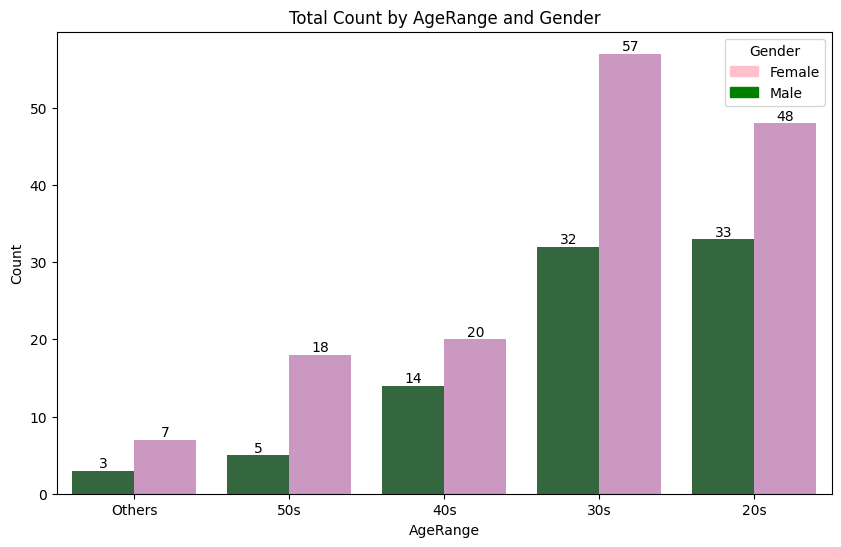

In [39]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(data=df_agerange, x='AgeRange', y='Total', hue='Gender', palette='cubehelix')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
legend_labels = ['Female', 'Male']
plt.legend(legend_handles, legend_labels, title='Gender')

plt.xlabel('AgeRange')
plt.ylabel('Count')
plt.title('Total Count by AgeRange and Gender')
plt.show()

#### 3.3.2 20s and 30s Employee's Work Life Balance

In [40]:
df_filtered = df_eda_left[(df_eda_left['AgeRange'] == '20s') | (df_eda_left['AgeRange'] == '30s')]

In [41]:
attrition_col2 = df_filtered.pop('Attrition')
df_filtered['Attrition'] = attrition_col2

In [42]:
df_filtered

,Department,Gender,Age,Education,MaritalStatus,DistanceFromHome,MonthlyIncome,WorkLifeBalance,AgeRange,Attrition
2,Research & Development,Male,37,2,Single,2,2090,3,30s,Yes
14,Research & Development,Male,28,3,Single,24,2028,3,20s,Yes
21,Sales,Male,36,4,Single,9,3407,3,30s,Yes
24,Research & Development,Male,34,1,Single,6,2960,3,30s,Yes
26,Research & Development,Female,32,1,Single,16,3919,3,30s,Yes
...,...,...,...,...,...,...,...,...,...,...
1379,Human Resources,Female,27,3,Married,22,2863,3,20s,Yes
1390,Research & Development,Male,28,3,Divorced,17,2367,2,20s,Yes
1395,Sales,Male,31,4,Married,26,5617,3,30s,Yes
1438,Sales,Male,23,3,Married,9,1790,2,20s,Yes


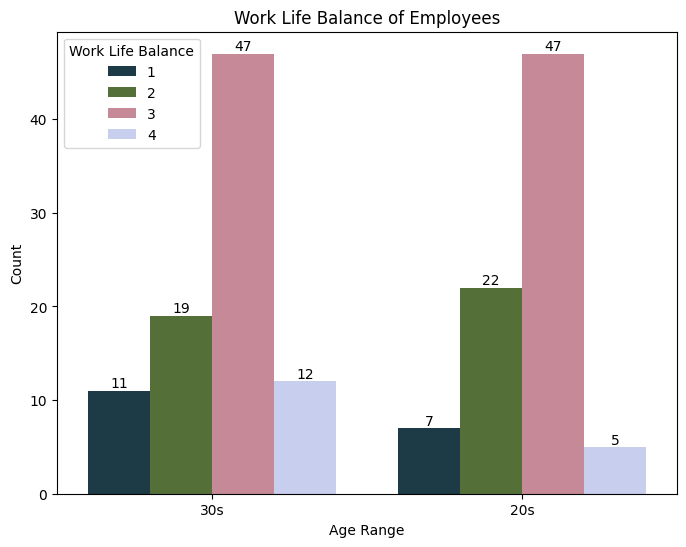


| Variable                | WorkLifeBalance        |
|-------------------------|------------------------|
| 1                       | Bad                    |
| 2                       | Good                   |
| 3                       | Better                 |
| 4                       | Best                   |


,AgeRange,WorkLifeBalance,Total
0,20s,1,7
1,20s,2,22
2,20s,3,47
3,20s,4,5
4,30s,1,11
5,30s,2,19
6,30s,3,47
7,30s,4,12


In [43]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_filtered, x='AgeRange', hue='WorkLifeBalance', palette='cubehelix')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Work Life Balance of Employees')
plt.legend(title='Work Life Balance')
plt.show()

from IPython.display import Markdown, display
table_content = """
| Variable                | WorkLifeBalance        |
|-------------------------|------------------------|
| 1                       | Bad                    |
| 2                       | Good                   |
| 3                       | Better                 |
| 4                       | Best                   |
"""

display(Markdown(table_content))

count_data = df_filtered.groupby(['AgeRange', 'WorkLifeBalance']).size().reset_index(name='Total')
count_data.reset_index(drop=True)



#### 3.3.3 Which department has the worst work-life balance?

In [44]:
grouped_data = df.groupby(['Department', 'WorkLifeBalance']).size().reset_index(name='Total')
grouped_data = grouped_data.sort_values('WorkLifeBalance', ascending=True)

grouped_data

,Department,WorkLifeBalance,Total
0,Human Resources,1,4
4,Research & Development,1,60
8,Sales,1,16
1,Human Resources,2,7
5,Research & Development,2,235
9,Sales,2,102
2,Human Resources,3,42
6,Research & Development,3,575
10,Sales,3,276
3,Human Resources,4,10


In [45]:
df_wlb = df.groupby(['WorkLifeBalance', 'Department', 'Attrition']).size().reset_index(name='Total').sort_values('WorkLifeBalance',ascending = True)
df_wlb = df_wlb.reset_index(drop=True)
df_wlb = df_wlb[
    ['WorkLifeBalance', 'Department', 'Total', 'Attrition']
]

df_wlb

,WorkLifeBalance,Department,Total,Attrition
0,1,Human Resources,4,No
1,1,Research & Development,41,No
2,1,Research & Development,19,Yes
3,1,Sales,10,No
4,1,Sales,6,Yes
5,2,Human Resources,5,No
6,2,Human Resources,2,Yes
7,2,Research & Development,203,No
8,2,Research & Development,32,Yes
9,2,Sales,78,No


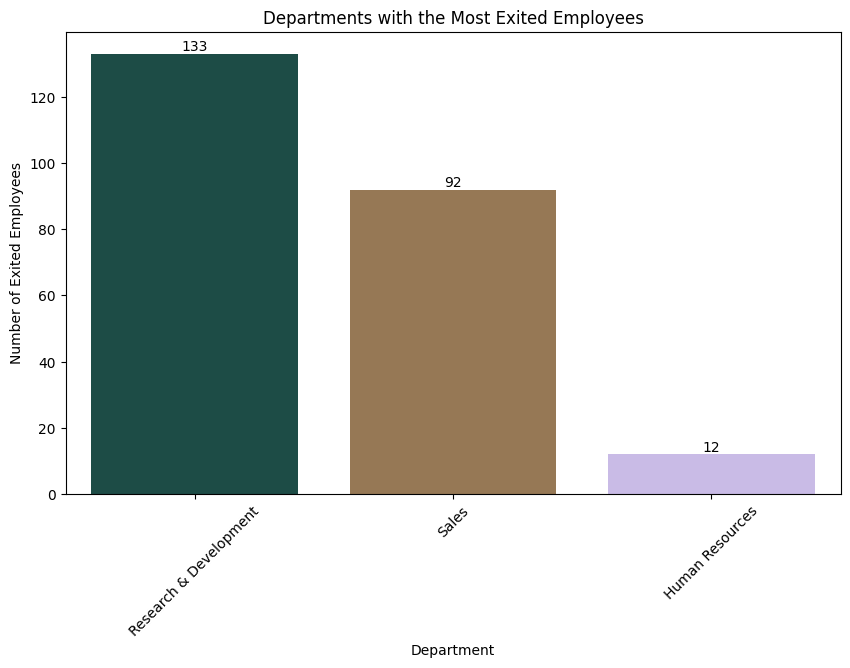

In [46]:
exited_employees = df_eda_left.groupby('Department').size().reset_index(name='Total')


exited_employees = exited_employees.sort_values('Total', ascending=False)


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=exited_employees, x='Department', y='Total', palette='cubehelix')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Department')
plt.ylabel('Number of Exited Employees')
plt.title('Departments with the Most Exited Employees')
plt.xticks(rotation=45)
plt.show()


#### 3.3.4 Distance From Home

<Figure size 1500x500 with 0 Axes>

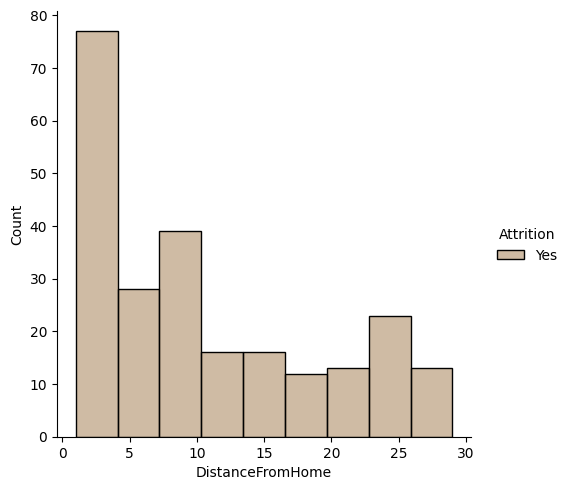

In [47]:
plt.figure(figsize=(15,5))
sns.displot(x='DistanceFromHome',data=df_eda_left, palette="cubehelix", hue='Attrition')
plt.show()

#### 3.3.5 Marital Status

In [48]:
employees_marital = df_eda_left.groupby('MaritalStatus').size().reset_index(name='Total')


employees_marital = employees_marital.sort_values('Total', ascending=False)
employees_marital

,MaritalStatus,Total
2,Single,120
1,Married,84
0,Divorced,33


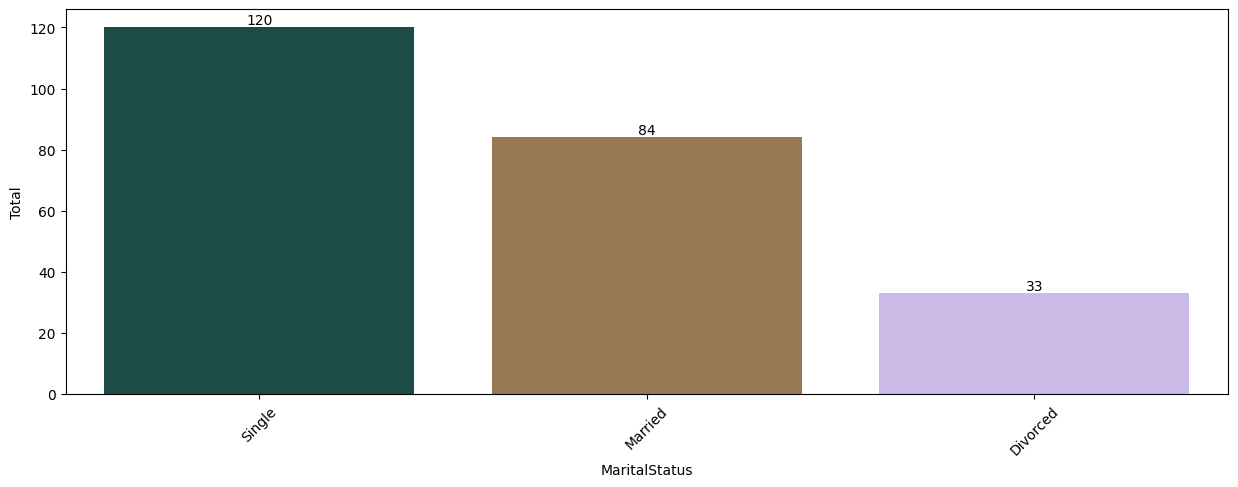

In [49]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='MaritalStatus',y='Total',data=employees_marital, palette="cubehelix")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('MaritalStatus')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

#### 3.3.6 Monthly Income

<Figure size 1500x500 with 0 Axes>

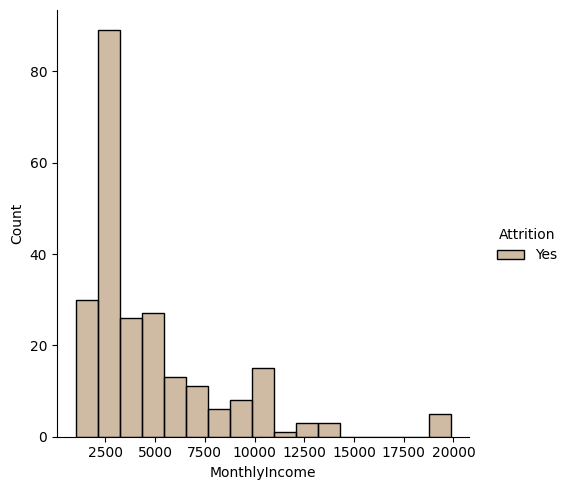

In [50]:
plt.figure(figsize=(15,5))
sns.displot(x='MonthlyIncome',data=df_eda_left, palette="cubehelix", hue='Attrition')
plt.show()

### 3.4 Features Correlation & Comparison

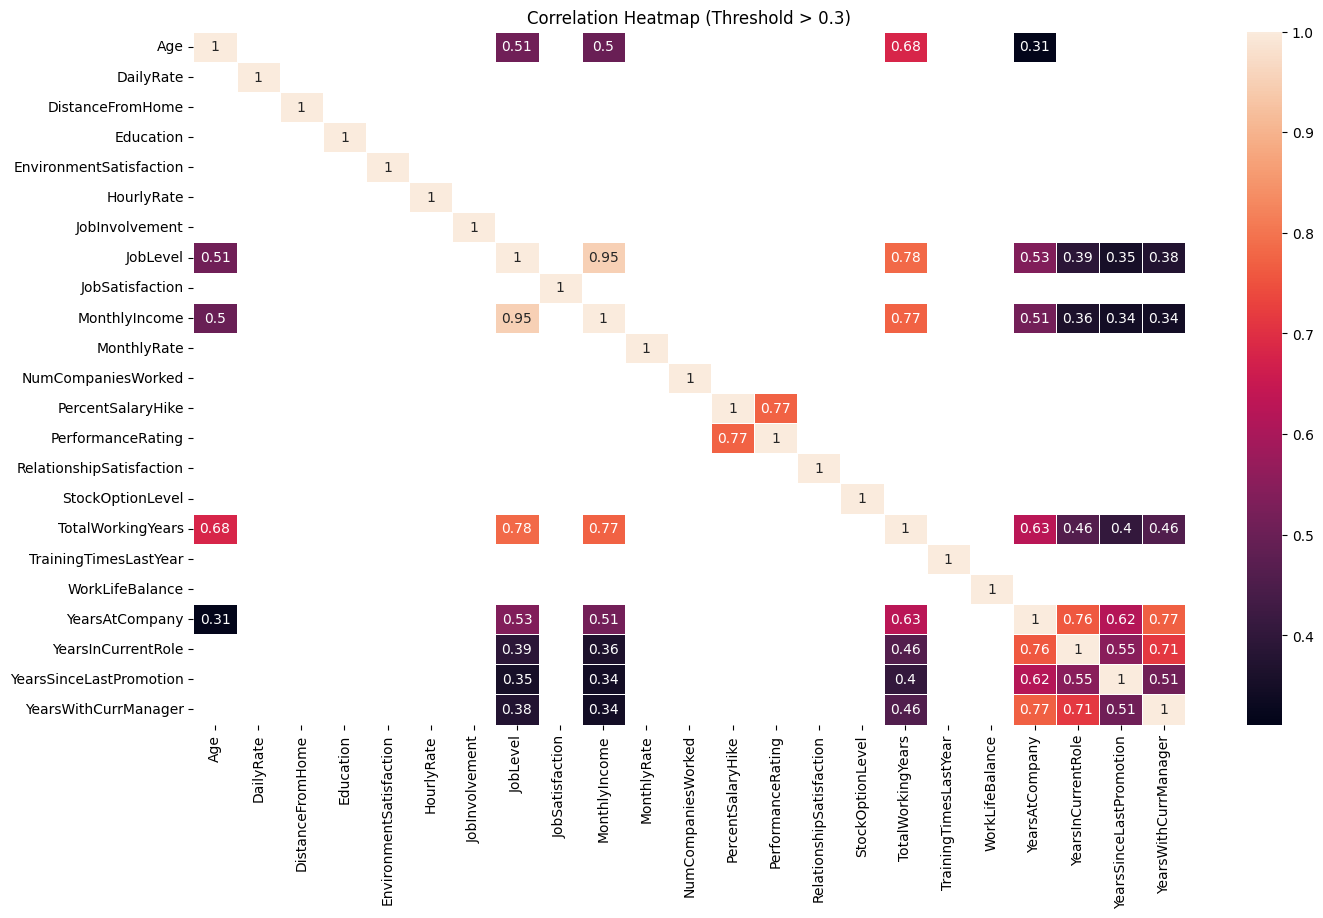

In [51]:
# Filter correlations above threshold
threshold = 0.3
correlations = df.corr()
corr_threshold = correlations[(correlations > threshold) | (correlations < -threshold)]


f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_threshold, annot=True, linewidths=0.5)

plt.title('Correlation Heatmap (Threshold > 0.3)')
plt.show()

In [52]:
fig = px.scatter(df, x='TotalWorkingYears', y='MonthlyIncome',
                 title='Relationship between Years at Company and Monthly Income',
                 labels={'TotalWorkingYears': 'Years', 'MonthlyIncome': 'Monthly Income'})
fig.show()


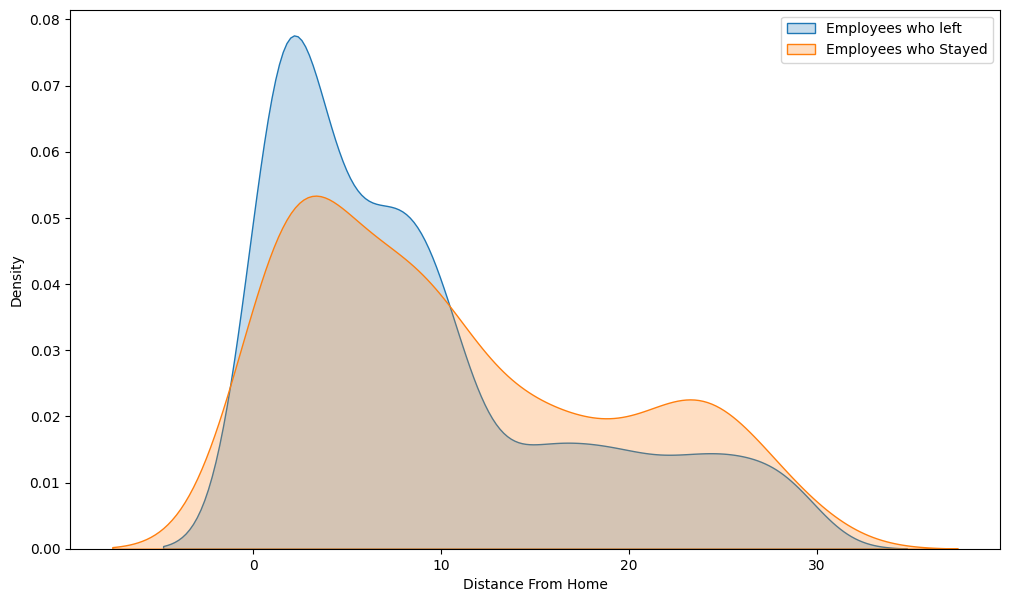

In [53]:
plt.figure(figsize=(12,7))

sns.kdeplot(df_eda_stay['DistanceFromHome'], label = 'Employees who left',fill=True)
sns.kdeplot(df_eda_left['DistanceFromHome'], label = 'Employees who Stayed', fill=True)

plt.xlabel('Distance From Home')
plt.legend()
plt.show()


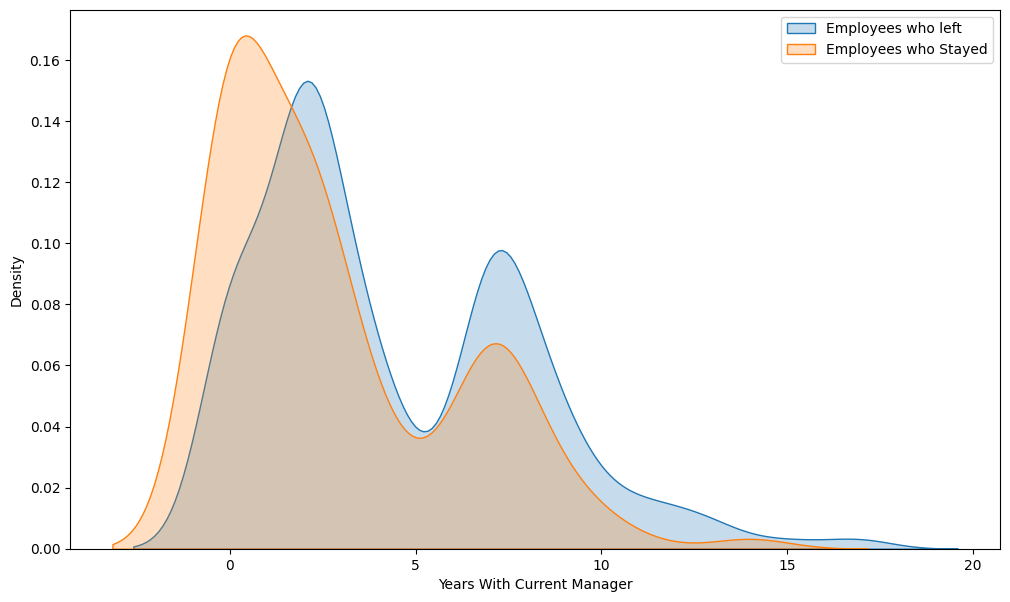

In [54]:
plt.figure(figsize=(12,7))

sns.kdeplot(df_stay['YearsWithCurrManager'], label = 'Employees who left',fill=True)
sns.kdeplot(df_left['YearsWithCurrManager'], label = 'Employees who Stayed', fill=True)

plt.xlabel('Years With Current Manager')
plt.legend()
plt.show()


## **4. Feature Selection**

### **4.1 Splitting the Dataset**

#### 4.1.1 Train and Test Data

In [55]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [56]:
Feature = df.drop('Attrition', axis=1)
Target = df[['Attrition']]

In [57]:
X_train, X_test,  y_train, y_test = train_test_split(Feature,
                                                               Target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= Target
                                                               )

In [58]:
df_clean = df.copy()

#### **4.1.2 Categorical and Numerical Features**

In [59]:
Xfsn = df_clean.drop(df.select_dtypes(exclude='int').columns.tolist(), axis = 1)
Xfsn

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,3,61,2,2,2,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,92,2,1,3,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,1,17,3,3,5,2,0,3,0
1466,39,613,6,1,4,42,2,3,1,9991,...,1,1,9,5,3,7,7,1,7,0
1467,27,155,4,3,2,87,4,2,2,6142,...,2,1,6,0,3,6,2,0,3,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,4,0,17,3,2,9,6,0,8,0


In [60]:
Xfsc = df_clean.drop(df.select_dtypes(include='int').columns.tolist(), axis = 1)
Xfsc

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


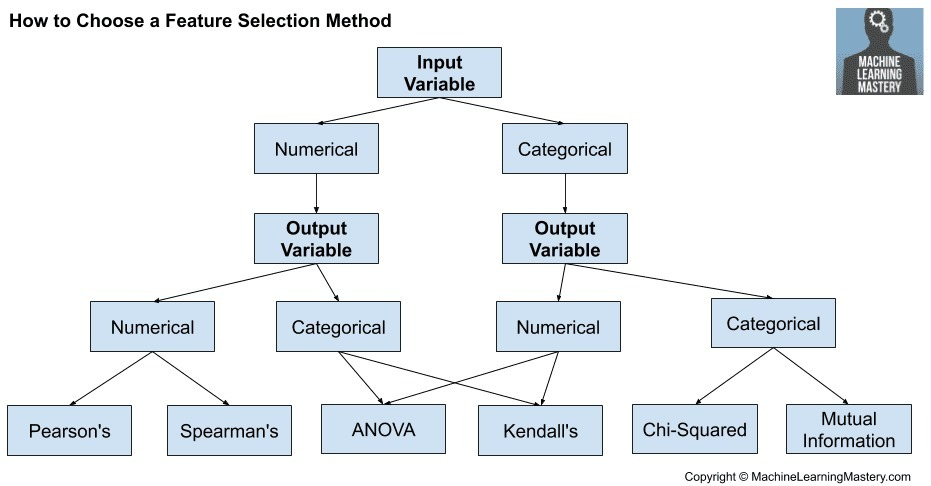

### 4.2 ANOVA Test (Feature Selection for Numerical Columns)




In [61]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(Xfsn, df[['Attrition']])
fit.scores_

array([3.81758868e+01, 4.72663984e+00, 8.96827659e+00, 1.44630813e+00,
       1.58552091e+01, 6.87959777e-02, 2.52419850e+01, 4.32153438e+01,
       1.58900038e+01, 3.84888190e+01, 3.37916458e-01, 2.78228670e+00,
       2.66728169e-01, 1.22503955e-02, 3.09557636e+00, 2.81405009e+01,
       4.42524914e+01, 5.21164607e+00, 6.02611616e+00, 2.70016238e+01,
       3.88383028e+01, 1.60221841e+00, 3.67123115e+01,            inf])

In [62]:
result = pd.Series(fit.scores_)
result.index = Xfsn.columns
result.sort_values(ascending=False)

Attrition                         inf
TotalWorkingYears           44.252491
JobLevel                    43.215344
YearsInCurrentRole          38.838303
MonthlyIncome               38.488819
Age                         38.175887
YearsWithCurrManager        36.712311
StockOptionLevel            28.140501
YearsAtCompany              27.001624
JobInvolvement              25.241985
JobSatisfaction             15.890004
EnvironmentSatisfaction     15.855209
DistanceFromHome             8.968277
WorkLifeBalance              6.026116
TrainingTimesLastYear        5.211646
DailyRate                    4.726640
RelationshipSatisfaction     3.095576
NumCompaniesWorked           2.782287
YearsSinceLastPromotion      1.602218
Education                    1.446308
MonthlyRate                  0.337916
PercentSalaryHike            0.266728
HourlyRate                   0.068796
PerformanceRating            0.012250
dtype: float64

### 4.3 Mutual Information Test (Feature Selection for Categorical Columns)




In [63]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_ohe = pd.DataFrame(ohe_enc.fit_transform(Xfsc), columns=ohe_enc.get_feature_names_out(Xfsc.columns))

In [64]:
cat_ohe

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [65]:
mutual_info = mutual_info_classif(cat_ohe, df[['Attrition']])
mutual_info


array([0.02009986, 0.0054907 , 0.00325958, 0.00468728, 0.00535821,
       0.        , 0.00296765, 0.00722292, 0.        , 0.        ,
       0.01409449, 0.01803317, 0.01434029, 0.01038455, 0.        ,
       0.01493192, 0.02393227, 0.        , 0.01500754, 0.02483185,
       0.00225801, 0.00896764, 0.00609072, 0.        , 0.0010168 ,
       0.0046198 , 0.03627256, 0.00741866])

In [66]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = cat_ohe.columns
mutual_info.sort_values(ascending=False)

OverTime_No                          0.036273
JobRole_Research Director            0.024832
JobRole_Laboratory Technician        0.023932
BusinessTravel_Non-Travel            0.020100
EducationField_Technical Degree      0.018033
JobRole_Manufacturing Director       0.015008
JobRole_Human Resources              0.014932
Gender_Female                        0.014340
EducationField_Other                 0.014094
Gender_Male                          0.010385
JobRole_Sales Executive              0.008968
OverTime_Yes                         0.007419
EducationField_Life Sciences         0.007223
JobRole_Sales Representative         0.006091
BusinessTravel_Travel_Frequently     0.005491
Department_Research & Development    0.005358
Department_Human Resources           0.004687
MaritalStatus_Single                 0.004620
BusinessTravel_Travel_Rarely         0.003260
EducationField_Human Resources       0.002968
JobRole_Research Scientist           0.002258
MaritalStatus_Married             

### 4.4 Final Dataframe

In [67]:
df_clean.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [68]:
df_clean = df_clean[['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole', 'OverTime', 'MaritalStatus']]

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TotalWorkingYears   1470 non-null   int64 
 1   JobLevel            1470 non-null   int64 
 2   YearsInCurrentRole  1470 non-null   int64 
 3   MonthlyIncome       1470 non-null   int64 
 4   Age                 1470 non-null   int64 
 5   JobRole             1470 non-null   object
 6   OverTime            1470 non-null   object
 7   MaritalStatus       1470 non-null   object
dtypes: int64(5), object(3)
memory usage: 92.0+ KB


## **5. Data Preprocessing (Pipeline)**

In [70]:
df_clean.columns

Index(['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome',
       'Age', 'JobRole', 'OverTime', 'MaritalStatus'],
      dtype='object')

In [71]:
catcol = df_clean.select_dtypes(exclude='int').columns.tolist()
catcol

['JobRole', 'OverTime', 'MaritalStatus']

In [72]:
for x in df_clean[catcol]:
    print(f'Value In {x}: ', df[x].unique(), '\n', 'Total Value:', len(df[x].unique()))
    print('-'*100)

Value In JobRole:  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 
 Total Value: 9
----------------------------------------------------------------------------------------------------
Value In OverTime:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In MaritalStatus:  ['Single' 'Married' 'Divorced'] 
 Total Value: 3
----------------------------------------------------------------------------------------------------


In [73]:
numcol = df_clean.select_dtypes(include='int').columns.tolist()
numcol

['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age']

### 5.1 Numerical Pipeline

In [74]:
num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

### 5.2 Categorical Pipeline

In [75]:
cat_pipeline = Pipeline([
    ('ohe_enc',  OneHotEncoder(sparse=False, handle_unknown='ignore'))
])


### 5.3 Full Pipeline

In [76]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline,numcol),
        ("cat", cat_pipeline,catcol),
    ])

### 5.4 New Train and Test Data

In [77]:
X_train_transformed = full_pipeline.fit_transform(X_train)
catcol_encoded_columns = full_pipeline.named_transformers_['cat']['ohe_enc'].get_feature_names_out(catcol)
transformed_column_names = numcol + list(catcol_encoded_columns)
X_train_final = pd.DataFrame(X_train_transformed, columns=transformed_column_names)

In [78]:
X_train_final

,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.150,0.00,0.111111,0.080937,0.261905,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.025,0.00,0.000000,0.031174,0.119048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.825,0.75,0.888889,0.652607,0.904762,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.400,0.50,0.388889,0.490574,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250,0.25,0.388889,0.242654,0.309524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.500,0.25,0.388889,0.186625,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1172,0.150,0.00,0.111111,0.178568,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1173,0.650,1.00,0.111111,0.974408,0.619048,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1174,0.025,0.00,0.000000,0.036493,0.476190,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [79]:
smote = SMOTE(random_state=21)

# Apply SMOTE to create a balanced training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

In [86]:
X_test_final = full_pipeline.transform(X_test)

In [87]:
catcol_encoded_columns = full_pipeline.named_transformers_['cat']['ohe_enc'].get_feature_names_out(catcol)
transformed_column_names = numcol + list(catcol_encoded_columns)
X_test_final = pd.DataFrame(X_test_final, columns=transformed_column_names)

In [88]:
X_test_final

,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.40,0.50,0.166667,0.660348,0.857143,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.25,0.50,0.000000,0.360821,0.476190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.45,0.00,0.111111,0.196419,0.595238,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.20,0.25,0.111111,0.178726,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.20,0.25,0.000000,0.258399,0.404762,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.50,0.00,0.444444,0.116482,0.761905,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
290,0.40,0.50,0.111111,0.666403,0.452381,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
291,0.25,0.25,0.333333,0.158241,0.404762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
292,0.25,0.25,0.388889,0.230016,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [89]:
y_test.value_counts()

Attrition
0            247
1             47
dtype: int64

##**6. Deep Learning**

### 6.1 Model Building

In [90]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               10000     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 511,501
Trainable params: 511,501
Non-trainable params: 0
_________________________________________________________________


### 6.2 Model Training

In [92]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [93]:
epochs_hist = model.fit(X_train_balanced, y_train_balanced, epochs = 100, batch_size = 50)

Epoch 1/100
40/40 [==============================] - 2s 9ms/step - loss: 0.5518 - accuracy: 0.7084
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.5138 - accuracy: 0.7368
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4941 - accuracy: 0.7475
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4624 - accuracy: 0.7718
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4509 - accuracy: 0.7723
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4304 - accuracy: 0.7946
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4263 - accuracy: 0.8027
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8144
Epoch 9/100
40/40 [==============================] - 0s 7ms/step - loss: 0.3936 - accuracy: 0.8261
Epoch 10/100
40/40 [==============================] - 0s 6ms/step - loss: 0.3806 - accuracy: 0.8296
Epoch 11/

### 6.3 Model Evaluation

In [94]:
y_pred = model.predict(X_test_final)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 2ms/step


In [95]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

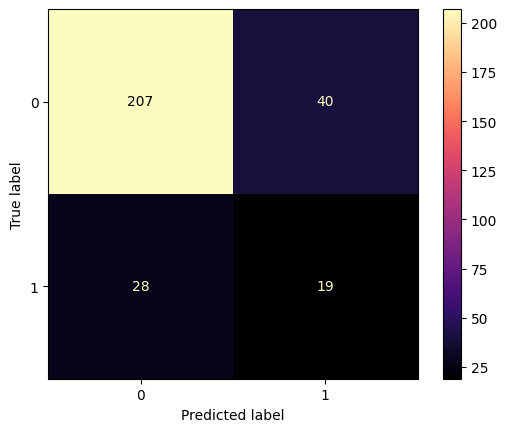

In [96]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       247
           1       0.32      0.40      0.36        47

    accuracy                           0.77       294
   macro avg       0.60      0.62      0.61       294
weighted avg       0.79      0.77      0.78       294



### 6.4 Model Inference

In [98]:
pickle.dump(full_pipeline, open('employeeAttrition_pred.pkl','wb'))

model.save('employee_attrition_model.h5')

In [99]:
df_clean.columns

Index(['TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome',
       'Age', 'JobRole', 'OverTime', 'MaritalStatus'],
      dtype='object')

In [100]:
for x in df_clean:
    print(f'Value In {x}: ', df_clean[x].unique(), '\n', 'Total Value:', len(df_clean[x].unique()))
    print('-'*100)

Value In TotalWorkingYears:  [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27] 
 Total Value: 40
----------------------------------------------------------------------------------------------------
Value In JobLevel:  [2 1 3 4 5] 
 Total Value: 5
----------------------------------------------------------------------------------------------------
Value In YearsInCurrentRole:  [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17] 
 Total Value: 19
----------------------------------------------------------------------------------------------------
Value In MonthlyIncome:  [5993 5130 2090 ... 9991 5390 4404] 
 Total Value: 1349
----------------------------------------------------------------------------------------------------
Value In Age:  [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 
 Total Value: 43
------------------------

In [105]:
df_inf =pd.DataFrame ({
'Age': [30,25,47],
'JobLevel': [2,1,3],
'TotalWorkingYears': [7,2,14],
'YearsInCurrentRole': [3 ,1 ,8] ,
'MonthlyIncome': [4500, 3100, 6000],
'JobRole': ['Sales Executive', 'Research Scientist', 'Laboratory Technician'],
'MaritalStatus': ['Single', 'Married', 'Divorced'],
'Overtime': ['Yes','No','No'],
 })

In [106]:
df_inf

,Age,JobLevel,TotalWorkingYears,YearsInCurrentRole,MonthlyIncome,JobRole,MaritalStatus,Overtime
0,30,2,7,3,4500,Sales Executive,Single,Yes
1,25,1,2,1,3100,Research Scientist,Married,No
2,47,3,14,8,6000,Laboratory Technician,Divorced,No


In [107]:
df_inf_final = full_pipeline.transform(df_inf.rename(columns={'Overtime': 'OverTime'}))

In [108]:
Category = np.round(model.predict(df_inf_final))
Category

1/1 [==============================] - 0s 15ms/step


array([[0.],
       [0.],
       [0.]], dtype=float32)

In [109]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['TotalWorkingYears', 'JobLevel',
                                  'YearsInCurrentRole', 'MonthlyIncome',
                                  'Age']),
                                ('cat',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['JobRole', 'OverTime', 'MaritalStatus'])])

In [110]:
df_clean['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [113]:
df_clean.query('Age == 19')

,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,JobRole,OverTime,MaritalStatus
127,0,1,0,1675,19,Sales Representative,Yes,Single
149,1,1,0,1483,19,Laboratory Technician,No,Single
171,1,1,0,2325,19,Sales Representative,No,Single
177,1,1,0,1102,19,Laboratory Technician,No,Single
422,1,1,0,2564,19,Human Resources,No,Single
688,1,1,0,2121,19,Sales Representative,Yes,Single
853,1,1,1,2552,19,Research Scientist,No,Single
892,1,1,1,1859,19,Research Scientist,Yes,Single
909,1,1,0,2994,19,Research Scientist,Yes,Single


In [118]:
print(pd.__version__)
print(np.__version__)
print(tf.__version__)

1.5.3
1.22.4
2.12.0
